# Imports

In [2]:
import pandas as pd
import seaborn
from scipy.stats import spearmanr
import numpy as np

# Load Datasets

Please, note that this notebook was designed specifically for working in Google.colab environment

## Whole texts


In [ ]:
from google.colab import files
whole_text = files.upload()

Saving data.tsv to data.tsv


In [ ]:
df = pd.read_table('/content/data.tsv')
df.set_index("Filename", inplace=True)
df

,n_sentences,n_tokens,tokens_per_sent,char_per_tok,ttr_lemma_chunks_100,ttr_lemma_chunks_200,ttr_form_chunks_100,ttr_form_chunks_200,upos_dist_ADJ,upos_dist_ADP,...,subordinate_proposition_dist,subordinate_post,subordinate_pre,avg_subordinate_chain_len,subordinate_dist_1,subordinate_dist_2,subordinate_dist_3,subordinate_dist_4,subordinate_dist_5,Unnamed: 130
Filename,,,,,,,,,,,,,,,,,,,,,
ref,2062,36426,17.665373,5.820159,0.74,0.640,0.87,0.785,7.843299,9.784220,...,57.904085,87.467134,12.532866,1.243770,80.119177,16.143012,3.250271,0.216685,0.270856,NaN
Online-A,2064,36516,17.691860,5.762941,0.76,0.645,0.85,0.810,7.958155,9.357542,...,42.073927,57.926073,87.965739,12.034261,1.266237,78.797638,17.444981,2.576490,0.751476,NaN
Online-B,2075,36152,17.422651,5.784202,0.75,0.670,0.87,0.805,7.861252,9.603895,...,42.091966,57.908034,86.692845,13.307155,1.242066,80.258203,16.406670,2.366864,0.806885,0.161377
Online-G,2056,37742,18.357004,5.774752,0.78,0.640,0.89,0.800,7.675799,9.511950,...,58.298397,87.521151,12.478849,1.261261,79.279279,16.905140,2.543720,0.953895,0.317965,NaN
Online-W,2069,36861,17.815853,5.756830,0.74,0.620,0.87,0.795,7.560837,9.576517,...,87.572383,12.427617,1.246553,80.143409,16.161059,2.813017,0.661886,0.220629,NaN,NaN
Online-Y,2065,35641,17.259564,5.788135,0.77,0.630,0.90,0.805,7.973963,9.525546,...,56.647550,86.470318,13.529682,1.254014,79.243119,17.201835,2.580275,0.860092,0.114679,NaN
PROMT,2064,36200,17.538760,5.759183,0.79,0.660,0.89,0.815,7.781768,9.453039,...,57.880091,87.587413,12.412587,1.263965,78.860898,17.469880,2.519168,0.766703,0.328587,NaN
SRPOL,2062,37114,17.999030,5.680994,0.74,0.620,0.85,0.785,7.657488,9.187908,...,58.691910,87.725178,12.274822,1.276776,76.935313,19.459173,2.863203,0.477200,0.265111,NaN


## Only short sentences

In [ ]:
from google.colab import files
short_files = files.upload()

Saving 5619.tsv to 5619.tsv
Saving 5620.tsv to 5620.tsv
Saving 5621.tsv to 5621.tsv
Saving 5622.tsv to 5622.tsv
Saving 5623.tsv to 5623.tsv
Saving 5624.tsv to 5624.tsv
Saving 5625.tsv to 5625.tsv


In [ ]:
df_short = pd.DataFrame()
df_short['n_tokens'] = []
for file in list(short_files.keys()): 
  table = pd.read_table(f'/content/{file}')
  df_short = df_short.merge(table, how='outer')
df_short.set_index("Filename", inplace=True)
df_short

,n_sentences,n_tokens,tokens_per_sent,char_per_tok,ttr_lemma_chunks_100,ttr_lemma_chunks_200,ttr_form_chunks_100,ttr_form_chunks_200,upos_dist_ADJ,upos_dist_ADP,...,subordinate_pre,avg_subordinate_chain_len,subordinate_dist_1,subordinate_dist_2,subordinate_dist_3,subordinate_dist_4,prep_dist_3,dep_dist_nummod:entity,dep_dist_expl,aux_num_pers_dist_Sing+2
Filename,,,,,,,,,,,,,,,,,,,,,
generaltest2022_en-ru_hyp_Online-A_ru_short.conllu,1235,12917,10.459109,5.817362,0.72,0.660,0.81,0.795,7.896570,8.090114,...,15.126050,1.147673,86.356340,12.680578,0.802568,0.160514,NaN,NaN,NaN,NaN
generaltest2022_en-ru_hyp_Online-B_ru_short.conllu,1222,12686,10.381342,5.843045,0.76,0.670,0.86,0.805,7.977298,8.229544,...,15.797101,1.123779,88.762215,10.260586,0.814332,0.162866,1.048951,0.007883,NaN,NaN
generaltest2022_en-ru_hyp_Online-G_ru_short.conllu,1192,12864,10.791946,5.826535,0.70,0.635,0.84,0.785,7.618159,8.310012,...,13.497823,1.148333,86.500000,12.500000,0.666667,0.333333,0.374532,0.007774,NaN,NaN
generaltest2022_en-ru_hyp_Online-W_ru_short.conllu,1223,12981,10.614064,5.808567,0.71,0.680,0.85,0.820,7.526385,8.504738,...,14.616498,1.158863,85.618729,13.043478,1.170569,0.167224,0.357143,NaN,NaN,NaN
generaltest2022_en-ru_hyp_Online-Y_ru_short.conllu,1235,12860,10.412955,5.848949,0.75,0.650,0.87,0.805,8.009331,8.398134,...,15.271659,1.169521,85.102740,13.184932,1.369863,0.342466,1.048951,NaN,NaN,NaN
generaltest2022_en-ru_hyp_PROMT_ru_short.conllu,1221,12691,10.393939,5.794028,0.76,0.660,0.85,0.805,7.572295,8.376014,...,15.261628,1.159933,85.858586,12.794613,0.841751,0.505051,0.751880,NaN,0.00788,NaN
generaltest2022_en-ru_hyp_SRPOL_ru_short.conllu,1208,12803,10.598510,5.730499,0.70,0.655,0.81,0.795,7.568539,8.052800,...,14.431487,1.135762,87.417219,11.754967,0.662252,0.165563,NaN,NaN,NaN,0.806452


## Only long sentences

In [ ]:
from google.colab import files
long_files = files.upload()

Saving 5612.tsv to 5612.tsv
Saving 5613.tsv to 5613.tsv
Saving 5614.tsv to 5614.tsv
Saving 5615.tsv to 5615.tsv
Saving 5616.tsv to 5616.tsv
Saving 5617.tsv to 5617.tsv
Saving 5618.tsv to 5618.tsv


In [ ]:
df_long = pd.DataFrame()
df_long['n_tokens'] = []
for file in list(long_files.keys()): 
  table = pd.read_table(f'/content/{file}')
  df_long = df_long.merge(table, how='outer')
df_long.set_index("Filename", inplace=True)
df_long

,n_sentences,n_tokens,tokens_per_sent,char_per_tok,ttr_lemma_chunks_100,ttr_lemma_chunks_200,ttr_form_chunks_100,ttr_form_chunks_200,upos_dist_ADJ,upos_dist_ADP,...,subordinate_post,subordinate_pre,avg_subordinate_chain_len,subordinate_dist_1,subordinate_dist_2,subordinate_dist_3,subordinate_dist_4,subordinate_dist_5,aux_num_pers_dist_Sing+1,dep_dist_nummod:entity
Filename,,,,,,,,,,,,,,,,,,,,,
generaltest2022_en-ru_hyp_Online-A_ru_long.conllu,836,23599,28.228469,5.736395,0.78,0.585,0.86,0.725,7.996102,10.051273,...,89.135802,10.864198,1.327141,74.878837,19.951535,3.473344,1.050081,0.565428,NaN,NaN
generaltest2022_en-ru_hyp_Online-B_ru_long.conllu,852,23468,27.544601,5.752997,0.77,0.610,0.90,0.755,7.793591,10.346003,...,87.772926,12.227074,1.300161,76.083467,19.422151,3.130016,1.123596,0.240770,0.408163,NaN
generaltest2022_en-ru_hyp_Online-G_ru_long.conllu,870,24869,28.585057,5.750300,0.80,0.605,0.88,0.740,7.708392,10.137119,...,87.940299,12.059701,1.313908,75.912976,18.958819,3.418803,1.243201,0.466200,0.396825,0.004021
generaltest2022_en-ru_hyp_Online-W_ru_long.conllu,845,23870,28.248521,5.731300,0.79,0.605,0.87,0.760,7.582740,10.163385,...,88.610039,11.389961,1.289712,77.448560,17.695473,3.621399,0.905350,0.329218,2.553191,0.004189
generaltest2022_en-ru_hyp_Online-Y_ru_long.conllu,827,22779,27.544135,5.755059,0.80,0.595,0.88,0.745,7.954695,10.162869,...,87.256875,12.743125,1.296808,76.272649,19.240725,3.192407,1.121657,0.172563,0.431034,0.004390
generaltest2022_en-ru_hyp_PROMT_ru_long.conllu,844,23507,27.851896,5.741695,0.81,0.600,0.91,0.765,7.904029,10.035309,...,88.805503,11.194497,1.314379,75.467100,19.740049,3.330626,0.893582,0.487409,0.400000,NaN
generaltest2022_en-ru_hyp_SRPOL_ru_long.conllu,855,24314,28.437427,5.655793,0.78,0.570,0.87,0.740,7.699268,9.784486,...,88.522660,11.477340,1.342701,72.053084,23.028884,3.903201,0.624512,0.390320,1.379310,NaN


# Count Spearman Correlation

In [ ]:
scores_human = np.array([80.7, 84.4, 86.0, 87.3, 82.5, 81.0, 79.5])
scores_comet = np.array([67.3, 72.9, 73.1, 75.1, 69.8, 60.3, 59.7])
scores_chrf = np.array([58.1, 59.7, 59.5, 58.3, 58.3, 56.1, 56.4])

## Overall

### Basic DataFrame (whole texts)

In [ ]:
df_human_corr = pd.DataFrame(columns=df.columns, index=('human_correlation_coef',))
df_comet_corr = pd.DataFrame(columns=df.columns, index=('comet_correlation_coef',))
df_chrf_corr = pd.DataFrame(columns=df.columns, index=('chrf_correlation_coef',))

In [ ]:
for feature in df.iteritems():
  if feature[1].isnull().sum() == 0:
    df_human_corr[feature[0]] = spearmanr(feature[1].iloc[1:], scores_human)[0]
    df_comet_corr[feature[0]] = spearmanr(feature[1].iloc[1:], scores_comet)[0]
    df_chrf_corr[feature[0]] = spearmanr(feature[1].iloc[1:], scores_chrf)[0]

In [ ]:
df_final = pd.concat([df_human_corr.T, df_comet_corr.T, df_chrf_corr.T], axis=1)
df_final.dropna(inplace=True)
df_final = df_final.astype(float)
df_final.sort_values(by = ['human_correlation_coef', 'comet_correlation_coef', 'chrf_correlation_coef'], inplace=True, ascending=False)

### DataFrame for texts with short sentences only

In [ ]:
df_human_corr = pd.DataFrame(columns=df.columns, index=('human_correlation_coef',))
df_comet_corr = pd.DataFrame(columns=df.columns, index=('comet_correlation_coef',))
df_chrf_corr = pd.DataFrame(columns=df.columns, index=('chrf_correlation_coef',))

In [ ]:
for feature in df_short.iteritems():
  if feature[1].isnull().sum() == 0:
    df_human_corr[feature[0]] = spearmanr(feature[1], scores_human)[0]
    df_comet_corr[feature[0]] = spearmanr(feature[1], scores_comet)[0]
    df_chrf_corr[feature[0]] = spearmanr(feature[1], scores_chrf)[0]

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [ ]:
df_short_final = pd.concat([df_human_corr.T, df_comet_corr.T, df_chrf_corr.T], axis=1)
df_short_final.dropna(inplace=True)
df_short_final = df_short_final.astype(float)
df_short_final.sort_values(by = ['human_correlation_coef', 'comet_correlation_coef', 'chrf_correlation_coef'], inplace=True, ascending=False)

### DataFrame for texts with long sentences only

In [ ]:
df_human_corr = pd.DataFrame(columns=df.columns, index=('human_correlation_coef',))
df_comet_corr = pd.DataFrame(columns=df.columns, index=('comet_correlation_coef',))
df_chrf_corr = pd.DataFrame(columns=df.columns, index=('chrf_correlation_coef',))

In [ ]:
for feature in df_long.iteritems():
  if feature[1].isnull().sum() == 0:
    df_human_corr[feature[0]] = spearmanr(feature[1], scores_human)[0]
    df_comet_corr[feature[0]] = spearmanr(feature[1], scores_comet)[0]
    df_chrf_corr[feature[0]] = spearmanr(feature[1], scores_chrf)[0]

In [ ]:
df_long_final = pd.concat([df_human_corr.T, df_comet_corr.T, df_chrf_corr.T], axis=1)
df_long_final.dropna(inplace=True)
df_long_final = df_long_final.astype(float)
df_long_final.sort_values(by = ['human_correlation_coef', 'comet_correlation_coef', 'chrf_correlation_coef'], inplace=True, ascending=False)

## Sample Dataframe

### Basic

In [ ]:
df_sample = df_final[
    (df_final['human_correlation_coef'] >= 0.6) | 
    (df_final['human_correlation_coef'] <= -0.6) | 
    (df_final['comet_correlation_coef'] >= 0.6) | 
    (df_final['comet_correlation_coef'] <= -0.6) | 
    (df_final['chrf_correlation_coef'] >= 0.6) | 
    (df_final['chrf_correlation_coef'] <= -0.6)
    ]
df_sample

,human_correlation_coef,comet_correlation_coef,chrf_correlation_coef
verb_edges_dist_1,0.928571,0.857143,0.612637
dep_dist_mark,0.928571,0.857143,0.576600
n_prepositional_chains,0.857143,0.821429,0.882919
obj_post,0.857143,0.785714,0.522544
max_links_len,0.857143,0.714286,0.324337
upos_dist_ADP,0.821429,0.785714,0.774806
avg_token_per_clause,0.821429,0.714286,0.414431
verbal_root_perc,0.785714,0.642857,0.288300
avg_max_links_len,0.785714,0.642857,0.288300
verbs_tense_dist_Fut,0.750000,0.714286,0.612637


### Short

In [ ]:
df_short_sample = df_short_final[
    (df_short_final['human_correlation_coef'] >= 0.6) | 
    (df_short_final['human_correlation_coef'] <= -0.6) | 
    (df_short_final['comet_correlation_coef'] >= 0.6) | 
    (df_short_final['comet_correlation_coef'] <= -0.6) | 
    (df_short_final['chrf_correlation_coef'] >= 0.6) | 
    (df_short_final['chrf_correlation_coef'] <= -0.6)
    ]
df_short_sample

,human_correlation_coef,comet_correlation_coef,chrf_correlation_coef
subj_post,0.964286,0.928571,0.738769
obj_pre,0.892857,0.857143,0.522544
avg_max_depth,0.857143,0.892857,0.900937
aux_form_dist_Fin,0.857143,0.821429,0.576600
dep_dist_flat:name,0.785714,0.750000,0.432450
dep_dist_iobj,0.750000,0.714286,0.756787
dep_dist_csubj,0.750000,0.607143,0.090094
aux_tense_dist_Past,0.714286,0.607143,0.414431
upos_dist_ADP,0.714286,0.607143,0.162169
aux_num_pers_dist_Sing+3,0.714286,0.607143,0.162169


### Long

In [ ]:
df_long_sample = df_long_final[
    (df_long_final['human_correlation_coef'] >= 0.6) | 
    (df_long_final['human_correlation_coef'] <= -0.6) | 
    (df_long_final['comet_correlation_coef'] >= 0.6) | 
    (df_long_final['comet_correlation_coef'] <= -0.6) | 
    (df_long_final['chrf_correlation_coef'] >= 0.6) | 
    (df_long_final['chrf_correlation_coef'] <= -0.6)
    ]
df_long_sample

,human_correlation_coef,comet_correlation_coef,chrf_correlation_coef
dep_dist_nummod:gov,0.964286,0.928571,0.756787
subordinate_dist_1,0.857143,0.821429,0.594619
ttr_lemma_chunks_200,0.846881,0.774806,0.736364
verb_edges_dist_1,0.821429,0.750000,0.306319
aux_num_pers_dist_Plur+2,0.785714,0.857143,0.666694
upos_dist_ADP,0.785714,0.821429,0.846881
dep_dist_case,0.785714,0.821429,0.846881
verbs_tense_dist_Fut,0.785714,0.821429,0.738769
dep_dist_iobj,0.785714,0.821429,0.738769
avg_token_per_clause,0.785714,0.750000,0.558581


# Heatmaps

## Overall Heatmaps

### Basic DF

In [ ]:
seaborn.set(rc = {'figure.figsize':(15,30)})

<Axes: >

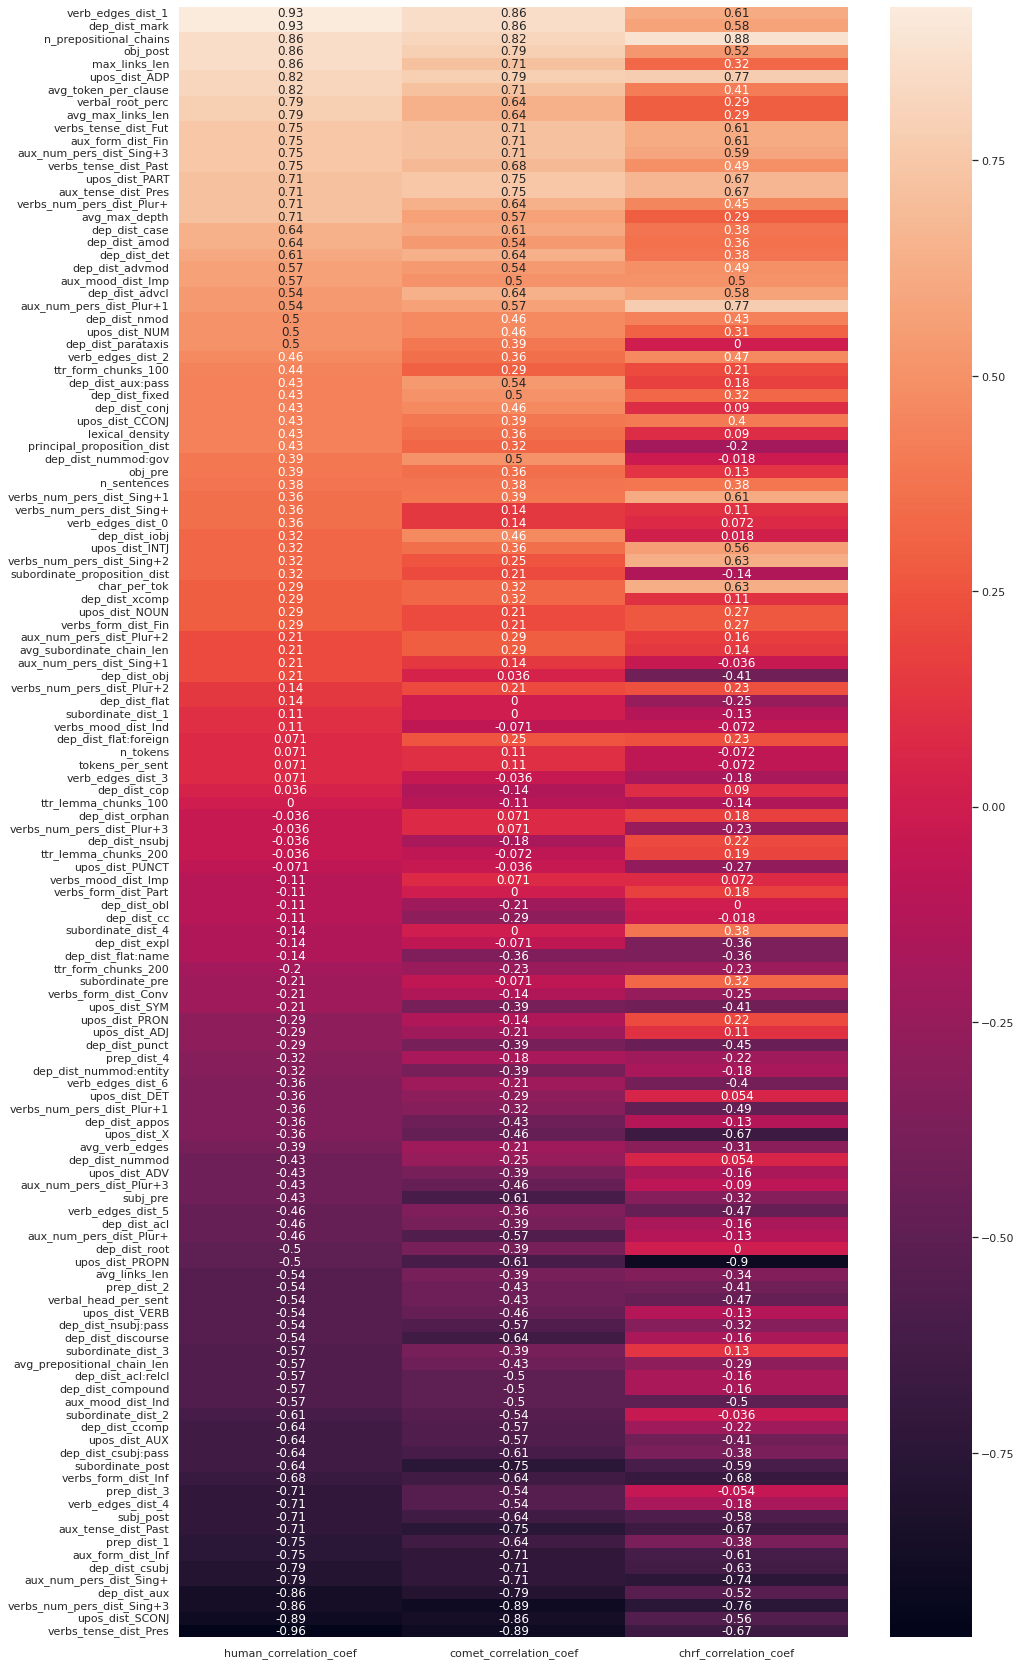

In [ ]:
seaborn.heatmap(df_final, annot=True)

### Short Sentences DF

In [ ]:
seaborn.set(rc = {'figure.figsize':(15,30)})

<Axes: >

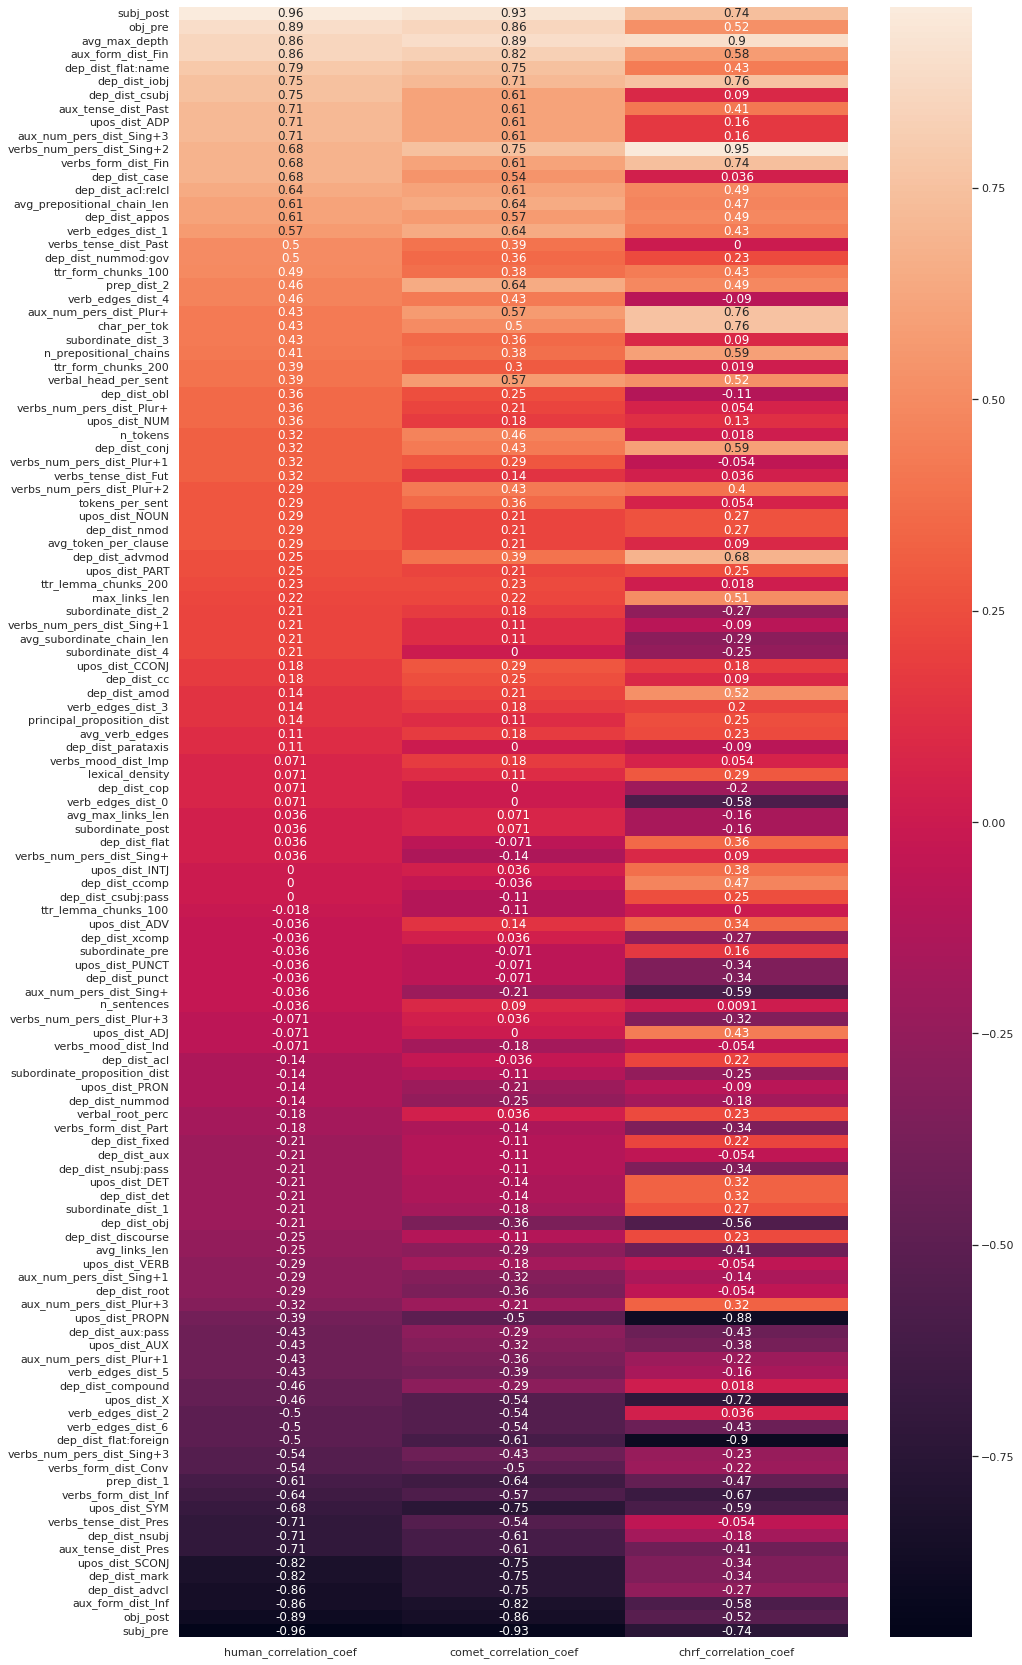

In [ ]:
seaborn.heatmap(df_short_final, annot=True)

### Long Sentences DF

In [ ]:
seaborn.set(rc = {'figure.figsize':(15,30)})

<Axes: >

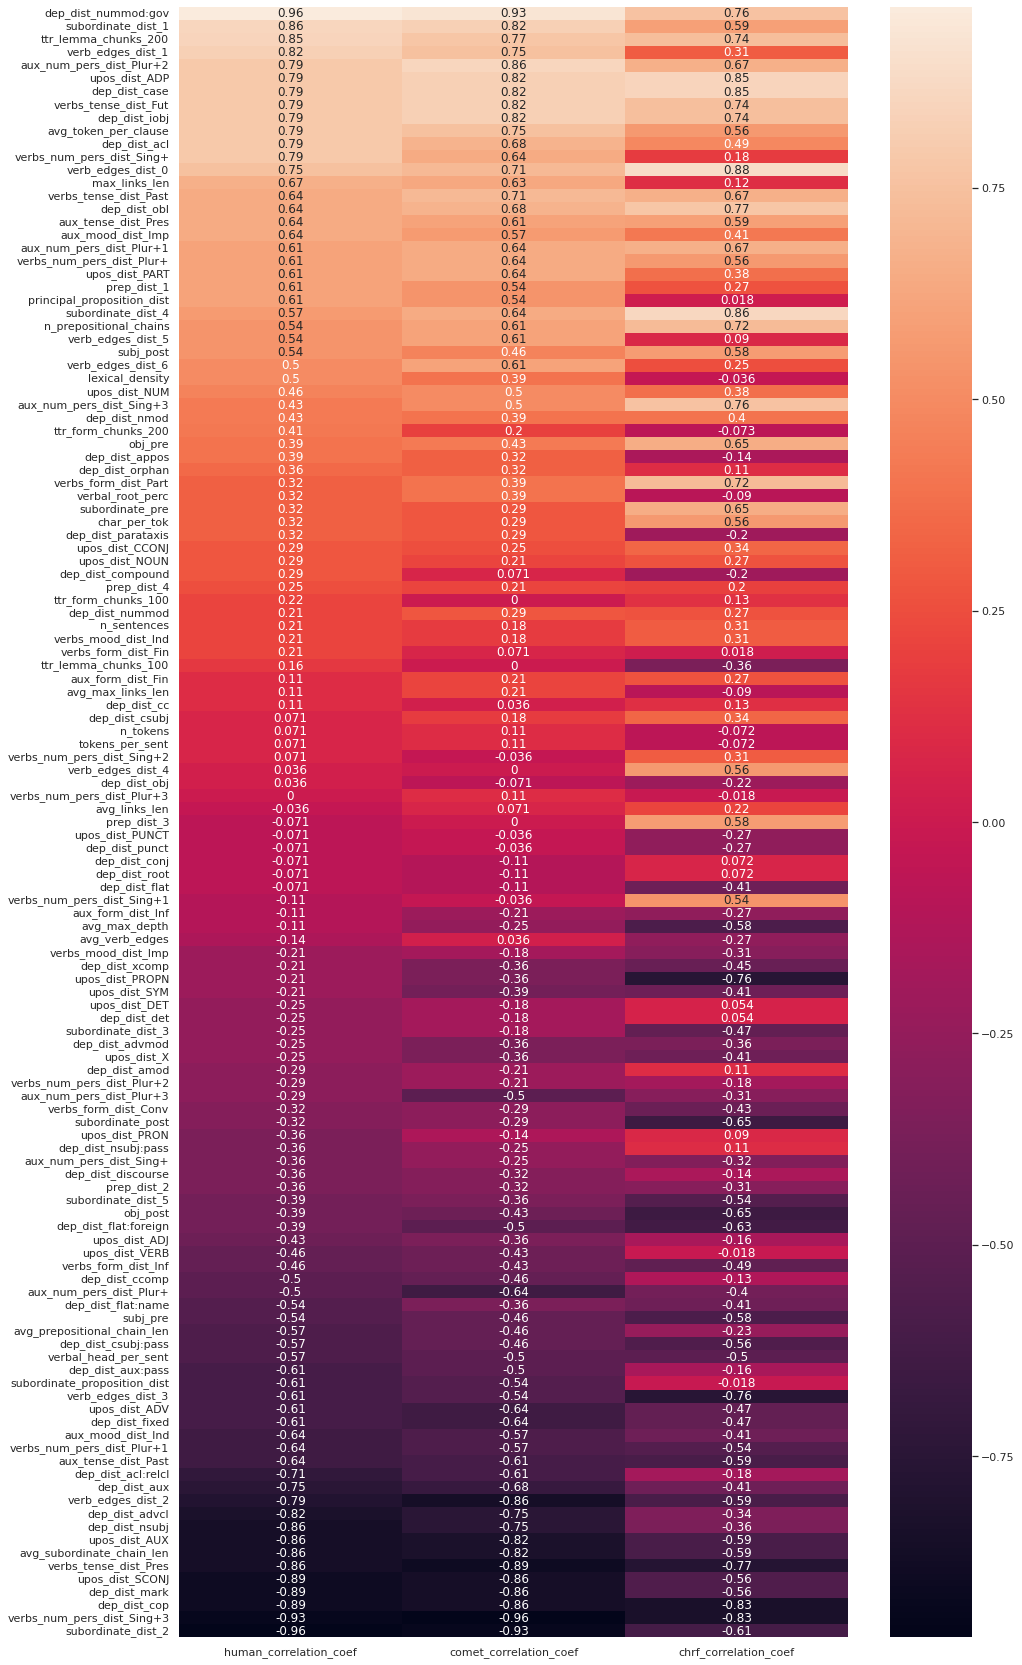

In [ ]:
seaborn.heatmap(df_long_final, annot=True)

## Features with Strong Correlation

### Basic DF

In [ ]:
seaborn.set(rc = {'figure.figsize':(10, 15)})

<Axes: >

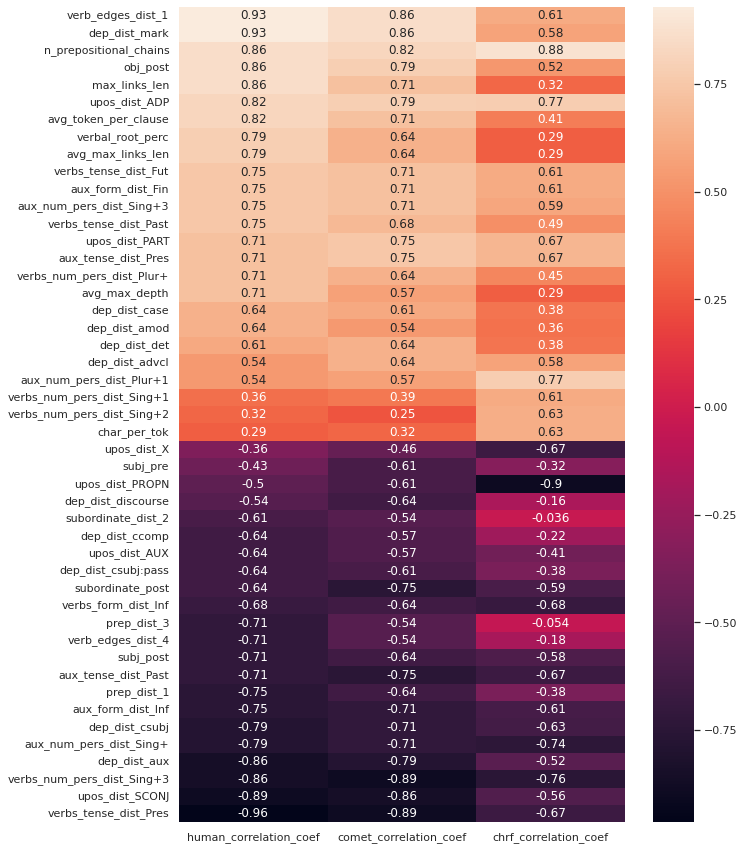

In [ ]:
seaborn.heatmap(df_sample, annot=True)

### Short Sentences DF

In [ ]:
seaborn.set(rc = {'figure.figsize':(10, 15)})

<Axes: >

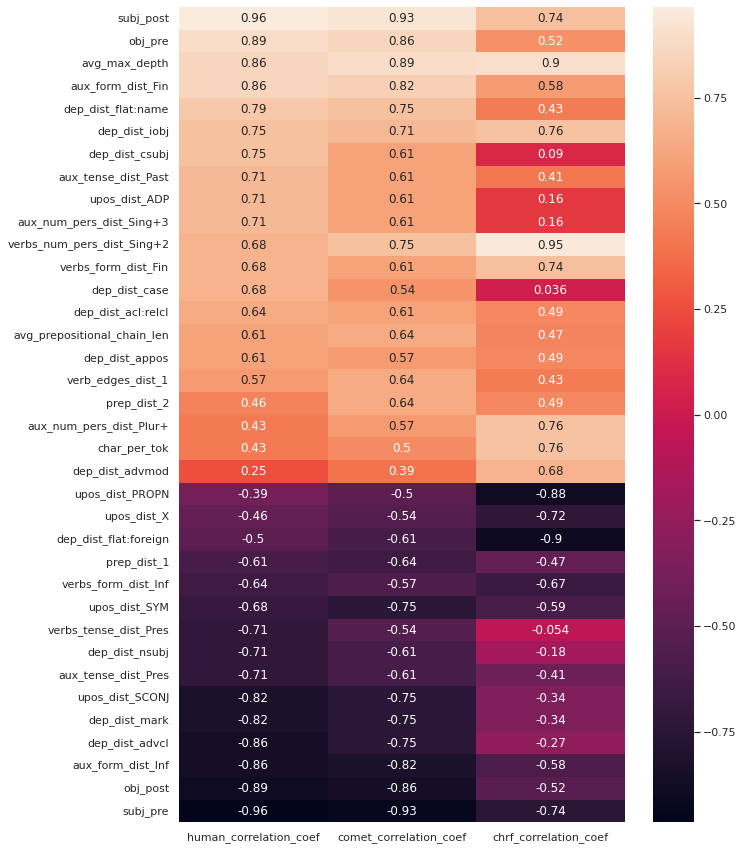

In [ ]:
seaborn.heatmap(df_short_sample, annot=True)

### Long Sentences DF

In [ ]:
seaborn.set(rc = {'figure.figsize':(10, 15)})

<Axes: >

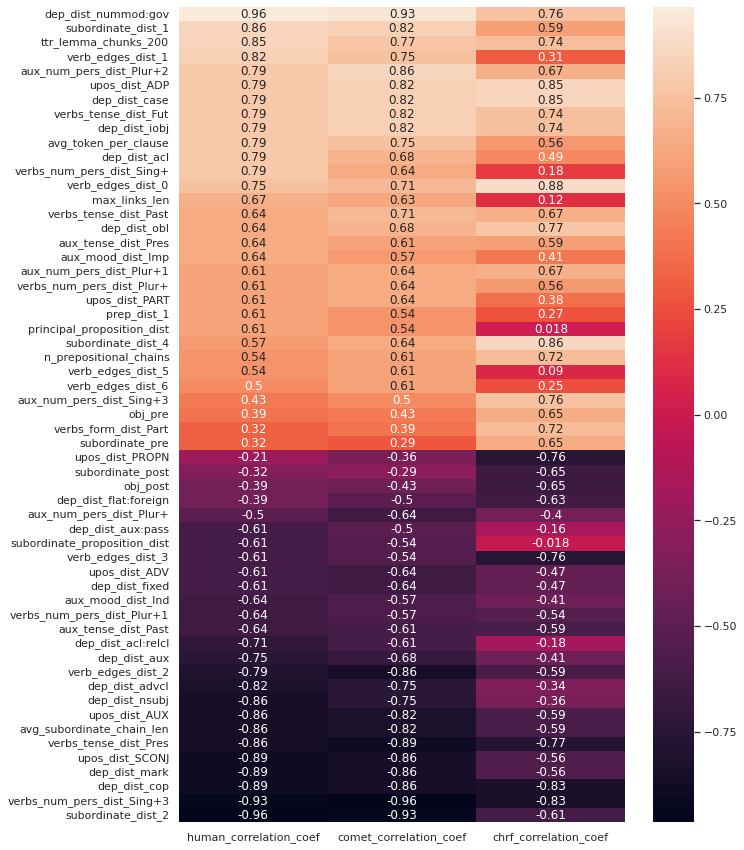

In [ ]:
seaborn.heatmap(df_long_sample, annot=True)